In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import torch

pd.set_option("display.max_columns", 100)

dirname = os.path.dirname(os.path.abspath("__file__"))
d = os.path.dirname(os.getcwd())

In [2]:
features_df = pd.read_csv(
    d + "/Datasets/training_set_features_normalized(new num).csv", 
    index_col="respondent_id"
)
labels_df = pd.read_csv(
    d + "/Datasets/training_set_labels.csv", 
    index_col="respondent_id"
)

In [3]:
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,3,1,2,2,1,2,3,0,0,1,0,0,1,1,2,2,0,0,20,23
1,3,2,0,1,0,1,0,1,1,0,0,0,0,0,1,5,4,4,4,2,4,1,1,0,0,0,0,0,0,0,0,0,0,3,5
2,1,1,0,1,0,0,0,0,0,2,2,1,0,0,2,3,1,1,4,1,2,0,3,0,0,1,0,1,0,3,0,2,0,6,9
3,1,1,0,1,0,1,1,0,0,0,1,1,0,0,2,3,3,5,5,4,1,4,1,0,1,0,0,0,1,9,1,0,0,20,23
4,2,1,0,1,0,1,1,0,1,0,0,0,0,0,2,3,3,2,3,1,4,2,2,0,1,1,1,1,0,3,0,1,0,7,13


In [6]:
features_df.dtypes

h1n1_concern                   int64
h1n1_knowledge                 int64
behavioral_antiviral_meds      int64
behavioral_avoidance           int64
behavioral_face_mask           int64
behavioral_wash_hands          int64
behavioral_large_gatherings    int64
behavioral_outside_home        int64
behavioral_touch_face          int64
doctor_recc_h1n1               int64
doctor_recc_seasonal           int64
chronic_med_condition          int64
child_under_6_months           int64
health_worker                  int64
health_insurance               int64
opinion_h1n1_vacc_effective    int64
opinion_h1n1_risk              int64
opinion_h1n1_sick_from_vacc    int64
opinion_seas_vacc_effective    int64
opinion_seas_risk              int64
opinion_seas_sick_from_vacc    int64
age_group                      int64
education                      int64
race                           int64
sex                            int64
income_poverty                 int64
marital_status                 int64
r

In [7]:
print("labels_df.shape", labels_df.shape)
labels_df.head()

labels_df.shape (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [4]:
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

In [5]:
joined_df = features_df.join(labels_df)
print(joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,3,1,2,2,1,2,3,0,0,1,0,0,1,1,2,2,0,0,20,23,0,0
1,3,2,0,1,0,1,0,1,1,0,0,0,0,0,1,5,4,4,4,2,4,1,1,0,0,0,0,0,0,0,0,0,0,3,5,0,1
2,1,1,0,1,0,0,0,0,0,2,2,1,0,0,2,3,1,1,4,1,2,0,3,0,0,1,0,1,0,3,0,2,0,6,9,0,0
3,1,1,0,1,0,1,1,0,0,0,1,1,0,0,2,3,3,5,5,4,1,4,1,0,1,0,0,0,1,9,1,0,0,20,23,0,1
4,2,1,0,1,0,1,1,0,1,0,0,0,0,0,2,3,3,2,3,1,4,2,2,0,1,1,1,1,0,3,0,1,0,7,13,0,0


In [6]:
import torch
from torch import nn
from torch.nn import functional as F
torch.cuda.is_available()
device = "cuda" if torch.cuda.is_available() else "cpu"

In [7]:
#Hyperparameters

n_hidden_units = 60
learning_rate = 0.001
mini_batch_size = 64
epochs = 50
n_features = x_train.shape[1]


NameError: name 'x_train' is not defined

In [8]:
##Scaler by Farahmand-m https://gist.github.com/farahmand-m/8a416f33a27d73a149f92ce4708beb40

class TorchStandardScaler:

    def __init__(self, mean=None, std=None, epsilon=1e-7):
        """Standard Scaler.
        The class can be used to normalize PyTorch Tensors using native functions. The module does not expect the
        tensors to be of any specific shape; as long as the features are the last dimension in the tensor, the module
        will work fine.
        :param mean: The mean of the features. The property will be set after a call to fit.
        :param std: The standard deviation of the features. The property will be set after a call to fit.
        :param epsilon: Used to avoid a Division-By-Zero exception.
        """
        self.mean = mean
        self.std = std
        self.epsilon = epsilon

    def fit(self, values):
        dims = list(range(values.dim() - 1))
        self.mean = torch.mean(values, dim=dims)
        self.std = torch.std(values, dim=dims)

    def transform(self, values):
        return (values - self.mean) / (self.std + self.epsilon)

    def fit_transform(self, values):
        self.fit(values)
        return self.transform(values)

In [9]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc


In [55]:
class DNNBC(nn.Module):
  def __init__(self,n_features = n_features):
    super(DNNBC,self).__init__()
    #input shape = 30
    self.n_hidden_units = n_hidden_units
    self.l1 = nn.Linear(n_features,self.n_hidden_units) 
    self.l2 = nn.Linear(self.n_hidden_units,self.n_hidden_units)
    self.l3 = nn.Linear(self.n_hidden_units,1)
    
      
  def forward(self,x):
    batch_norm = nn.BatchNorm1d(n_hidden_units).to(device)
    x = nn.functional.relu(self.l1(x))
    x = batch_norm(x)
    x = nn.functional.relu(self.l2(x))
    x = batch_norm(x)
    x = torch.sigmoid(self.l3(x)) #nn.functional.softmax
    return x


In [63]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler


std_scaler = TorchStandardScaler()
std_scaler2 = TorchStandardScaler()

RANDOM_SEED = 6
Y = labels_df['h1n1_vaccine'] 
X = features_df
#check if unbalanced
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=RANDOM_SEED)
print(Counter(y_train))

Y = torch.tensor(Y.values,dtype=torch.float32) #must transform back to integer for the classes
X = torch.tensor(X.values,dtype=torch.float32)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=RANDOM_SEED)

x_train= std_scaler.fit_transform( x_train)
x_test = std_scaler2.fit_transform( x_test)

#Change to gpu
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)
len(x_train),len(y_train), len(x_test),  len(y_test)



y_loss = {}  
y_loss['train'] = []
y_loss['test'] = []

y_accuracy = {}
y_accuracy['train'] = []
y_accuracy['test'] = []

n_hidden_units = 64



Counter({0: 15796, 1: 4234})


In [60]:
from sklearn.preprocessing import StandardScaler
torch.cuda.is_available()
device = "cuda" if torch.cuda.is_available() else "cpu"
df=pd.read_csv("creditcard_sample.csv")
Y = df['Class'] 
X = df.drop('Class', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=0) # make the random split reproducible

#scale
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train.values)
x_test =  std_scaler.fit_transform(x_test.values)

FileNotFoundError: [Errno 2] No such file or directory: 'creditcard_sample.csv'

In [64]:
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataloader import default_collate

#Training
y_train = y_train.unsqueeze(1)
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=mini_batch_size, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))


#Testing
y_test = y_test.unsqueeze(1)
test_ds = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_ds, batch_size=int(mini_batch_size/2), collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))

In [65]:
model = DNNBC(n_features =n_features).to(device)
torch.manual_seed(0)

optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate, momentum=0.9)
loss_f = nn.BCELoss()

In [66]:
#torch.multiprocessing.set_start_method('spawn')
import itertools
model.train()
y_pred_list = []


for epoch in range(epochs):
    
    for xb, yb in train_dl:
        y_pred = model(xb)            
        loss = loss_f(y_pred, yb) 
        acc = accuracy_f(y_pred=y_pred.to(torch.uint8), target = yb.to(torch.uint8))        

        optimizer.zero_grad()        
        loss.backward()               
        optimizer.step()              
    
    y_loss['train'].append(loss.item())
    y_accuracy['train'].append(acc)   
   
      


    model.eval()
    with torch.inference_mode():
        for xb_test,yb_test  in test_loader:
            y_test_pred = model(xb_test)
            y_pred_class = torch.round(y_test_pred)

            loss_test = loss_f(y_test_pred, yb_test) 
            acc_test = accuracy_f(y_pred=y_test_pred.to(torch.uint8), target = yb_test.to(torch.uint8))

           

            if epoch == epochs-1:
                y_pred_list.append(y_pred_class.cpu().detach().numpy())


        y_loss['test'].append(loss_test.item())
        y_accuracy['test'].append(acc_test)

    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Training Accuracy: {acc:.2f}% | Training Loss: {loss:.5f} || Test Accuracy: {acc_test:.2f}% | Test Loss: {loss_test:.5f}")

    


Epoch: 0 | Training Accuracy: 77.42% | Training Loss: 0.56972 || Test Accuracy: 76.19% | Test Loss: 0.50822
Epoch: 20 | Training Accuracy: 77.42% | Training Loss: 0.44647 || Test Accuracy: 76.19% | Test Loss: 0.38211
Epoch: 40 | Training Accuracy: 77.42% | Training Loss: 0.36284 || Test Accuracy: 76.19% | Test Loss: 0.39245


In [67]:
           
y_pred_list = [a for a in y_pred_list]
ytest_pred = list(itertools.chain.from_iterable(y_pred_list))

In [68]:
from sklearn import metrics
from torchmetrics import ConfusionMatrix, Precision, Recall
from torchmetrics.functional import f1_score
from torchmetrics import PrecisionRecallCurve
from sklearn.metrics import classification_report
from torchmetrics import ROC
target = y_test.cpu().detach().numpy()
preds = ytest_pred

0.7022442476608745


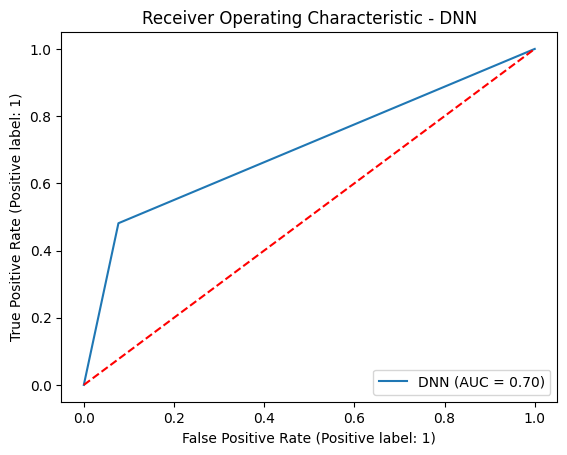

In [69]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from torchmetrics import AUROC
import matplotlib.pyplot as plt

def plot_AUROC(target, preds,run = None):
    roc_auc_s =roc_auc_score(target, preds)
    print(roc_auc_s)
    rocauc_plot = RocCurveDisplay.from_predictions(target, preds, name= "DNN")
    plt.title("Receiver Operating Characteristic - DNN")
    plt.plot([0, 1], [0, 1], color="red", linestyle="--")
    plt.plot()

    if run:
        run["roc_auc"] = roc_auc_s
        run["auroc_plot"] = rocauc_plot

plot_AUROC(target, preds)

Calculate the predictions for Seasonal vaccine variables

In [70]:
class NN2(nn.Module):

    def __init__(self, inputs_size):        
        super(NN2, self).__init__()

        # -- first layer
        #self.lin = nn.Linear(inputs_size,10)  
        self.n_hidden_units = n_hidden_units
        self.l1 = nn.Linear(inputs_size,self.n_hidden_units) #input shape = 30
        self.l2 = nn.Linear(self.n_hidden_units,self.n_hidden_units*2)
        self.l3 = nn.Linear(self.n_hidden_units*2,1)      

        # -- firstLayer --> binaryOutputA
        #self.l2a = nn.Linear(10,1)

        # -- firstLayer --> binaryOutputB
        #self.l2b = nn.Linear(10,2)

    def forward(self, x):
        #o = self.lin(inputs_size)
        #o1 = torch.log_softmax(self.l2a(o))

        x = torch.relu(self.l1(x))
        x = torch.relu(self.l2(x))
        x = torch.sigmoid(self.l3(x))
        #x = F.softmax(self.l3(x))
        
        #o2 = F.log_softmax(self.l2b(o))        
        return x# o1 #, o2

In [71]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score


std_scaler = TorchStandardScaler()
std_scaler2 = TorchStandardScaler()

RANDOM_SEED = 6
Y2 = labels_df['seasonal_vaccine'] 
X = features_df
#check if unbalanced

Y2 = torch.tensor(Y2.values,dtype=torch.float32) #must transform back to integer for the classes
X = torch.tensor(X.values,dtype=torch.float32)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X,Y2, test_size=0.25, random_state=RANDOM_SEED)

x_scaled2 = std_scaler.fit_transform(x_train2)
x_train2 = x_scaled2
x_test2 = std_scaler2.fit_transform( x_test2)

#Change to gpu
x_train2, y_train2 = x_train2.to(device), y_train2.to(device)
x_test2, y_test2 = x_test2.to(device), y_test2.to(device)
len(x_train2),len(y_train2), len(x_test2),  len(y_test2)

y_loss2 = {}  
y_loss2['train'] = []
y_loss2['test'] = []

y_accuracy2 = {}
y_accuracy2['train'] = []
y_accuracy2['test'] = []

n_hidden_units = 64

In [72]:
model2 = NN2(x_test2.shape[1]).to(device)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)
epochs = 3001
loss_fn = nn.BCEWithLogitsLoss()
#loss_fn =nn.BCELoss()

In [73]:
for epoch in range(epochs):
    #forward leap
    y_logits2 = model2(x_train2).squeeze()
    #logits into predictions (probabilities) and labels with "round"
    y_pred2 = torch.round(torch.sigmoid(y_logits2))     
    #loss and accuracy for Train set
    loss2 = loss_fn(y_logits2, y_train2) # BCEWithLogitsLoss calculates loss using logits
    y_loss2['train'].append(loss2.cpu().detach().numpy())
    acc2 = accuracy_fn(y_train2, 
                      y_pred2)
    y_accuracy2['train'].append(acc)

    
    #clear so I don't accumulate grads
    optimizer2.zero_grad()
    #backprop dloss/dx
    loss2.backward()
    #step
    optimizer2.step()
    #Evaluation
    model2.eval()
    with torch.inference_mode(): #no grad, avoids training and gradient calculation
      #forward 
      test_logits2 = model2(x_test2).squeeze()
      #logits into predictions (probabilities) and labels with "round"
      test_pred2 = torch.round(torch.sigmoid(test_logits2)) 
      #loss & accuracy for Test set
      test_loss2 = loss_fn(test_logits2, y_test2)
      y_loss2['test'].append(test_loss2.cpu().detach().numpy())
      test_acc2= accuracy_fn(y_true=y_test2,
                             y_pred=test_pred2)
      y_accuracy2['test'].append(test_acc2)

    # Print scores for Training and Test
    if epoch % 500 == 0:
        print(f"Epoch: {epoch} | Training Accuracy: {acc2:.2f}% | Training Loss: {loss2:.5f} || Test Accuracy: {test_acc2:.2f}% | Test Loss: {test_loss2:.5f}")

Epoch: 0 | Training Accuracy: 46.74% | Training Loss: 0.74002 || Test Accuracy: 46.01% | Test Loss: 0.72108
Epoch: 500 | Training Accuracy: 79.51% | Training Loss: 0.59387 || Test Accuracy: 78.06% | Test Loss: 0.62089
Epoch: 1000 | Training Accuracy: 79.41% | Training Loss: 0.59107 || Test Accuracy: 77.92% | Test Loss: 0.62150
Epoch: 1500 | Training Accuracy: 79.58% | Training Loss: 0.59088 || Test Accuracy: 78.06% | Test Loss: 0.62148
Epoch: 2000 | Training Accuracy: 79.67% | Training Loss: 0.59080 || Test Accuracy: 78.03% | Test Loss: 0.62161
Epoch: 2500 | Training Accuracy: 81.07% | Training Loss: 0.58966 || Test Accuracy: 77.86% | Test Loss: 0.62287
Epoch: 3000 | Training Accuracy: 81.07% | Training Loss: 0.58966 || Test Accuracy: 77.79% | Test Loss: 0.62281


In [76]:
roc_auc_score(y_test2.cpu().detach().numpy(), test_pred2.cpu().detach().numpy())
#roc_auc_score(y_test2.cpu().detach().numpy(), test_pred2)

0.7740273654212899

In [77]:
print("Shape for H1N1", test_pred.shape)
print("Shape for Seasonal", test_pred2.shape)

Shape for H1N1 torch.Size([6677])
Shape for Seasonal torch.Size([6677])


In [78]:
preds2 = test_pred2


In [79]:
y_eval1 = y_test.cpu().detach().numpy()


In [80]:
y_eval2 = y_test2.cpu().detach().numpy()

In [81]:
y_eval = np.vstack((y_eval1, y_eval2)).T
print("y_eval.shape:", y_eval.shape)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 6677

In [82]:

preds1 = preds1.cpu().detach().numpy()


AttributeError: 'list' object has no attribute 'cpu'

In [83]:
preds2 = preds2.cpu().detach().numpy()


In [84]:

preds = np.vstack((preds1, preds2))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 6677

In [232]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0],
        "seasonal_vaccine": preds[1],
    }
)


In [233]:
print("y_preds.shape:", y_preds.shape)
print("y_eval.shape:", y_eval.shape)
y_preds.head()

y_preds.shape: (6677, 2)
y_eval.shape: (6677, 2)


,h1n1_vaccine,seasonal_vaccine
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0


In [234]:
roc_auc_score(y_eval, y_preds)

0.7463573534679938

Mixed Model

In [10]:
class NN3(nn.Module):

    def __init__(self, inputs):        
        super(NN3, self).__init__()

        # -- first layer
        self.lin = nn.Linear(inputs,10)        

        # -- firstLayer --> binaryOutputA
        self.l2a = nn.Linear(10,2)

        # -- firstLayer --> binaryOutputB
        self.l2b = nn.Linear(10,2)

    def forward(self, inputs):
        o = self.lin(inputs)
        o1 = F.log_softmax(self.l2a(o))
        o2 = F.log_softmax(self.l2b(o))        
        return o1, o2

In [27]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score


std_scaler = TorchStandardScaler()
std_scaler2 = TorchStandardScaler()

RANDOM_SEED = 6
Y = labels_df[['h1n1_vaccine','seasonal_vaccine']] 
X = features_df
#check if unbalanced

Y = torch.tensor(Y.values,dtype=torch.float32) #must transform back to integer for the classes
X = torch.tensor(X.values,dtype=torch.float32)
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.25, random_state=RANDOM_SEED)

x_scaled = std_scaler.fit_transform(x_train)
x_train = x_scaled
x_test = std_scaler.fit_transform( x_test)

#Change to gpu
x_train, y_train= x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)
len(x_train),len(y_train), len(x_test),  len(y_test)

y_loss = {}  
y_loss['train'] = []
y_loss['test'] = []

y_accuracy= {}
y_accuracy['train'] = []
y_accuracy['test'] = []

n_hidden_units = 64

In [28]:
model3 = NN3(x_test.shape[1]).to(device)
optimizer = torch.optim.Adam(model3.parameters(), lr=0.01)
epochs = 3001
loss_fn = nn.BCEWithLogitsLoss()
#loss_fn =nn.BCELoss()

In [29]:
y_train[:,0].shape

torch.Size([20030])

In [30]:
for epoch in range(epochs):
    #forward leap
    y_logitsA, y_logitsB = model3(x_train)#.squeeze()
    y_logitsA = y_logitsA.squeeze()
    y_logitsB = y_logitsB.squeeze()
    
    #logits into predictions (probabilities) and labels with "round"
    predA = torch.round(torch.sigmoid(y_logitsA))    
    predB = torch.round(torch.sigmoid(y_logitsB))     

    #print(predA.shape)

    #loss and accuracy for Train set
    loss = 0
    loss += loss_fn(predA[:,0], y_train[:,0])
    loss += loss_fn(predB[:,1], y_train[:,1])

    loss.backward()
    
    y_loss['train'].append(loss.cpu().detach().numpy())
    
    y_pred = predA

    #print(y_pred.shape)


    acc = accuracy_fn(y_train, 
                      y_pred)
    y_accuracy['train'].append(acc)

    
    
    optimizer.zero_grad()
    #backprop dloss/dx
    
    #step
    optimizer.step()
    #Evaluation
    model3.eval()
    with torch.inference_mode(): #no grad, avoids training and gradient calculation
      #forward 
      #test_logits = model(x_test).squeeze()
      test_y_logitsA, test_y_logitsB = model3(x_test)
      
      test_y_logitsA = test_y_logitsA.squeeze()
      test_y_logitsB = test_y_logitsB.squeeze()

      test_predA = torch.round(torch.sigmoid(test_y_logitsA))   
      #print(test_predA.shape) 
      test_predB = torch.round(torch.sigmoid(test_y_logitsB)) 


      test_loss = 0
      test_loss += loss_fn(test_predA[:,0], y_test[:,0])
      test_loss += loss_fn(test_predB[:,1], y_test[:,1])

      test_pred = test_predA

      y_loss['test'].append(test_loss.cpu().detach().numpy())
      test_acc= accuracy_fn(y_true=y_test, y_pred=test_pred)
      y_accuracy['test'].append(test_acc)

    # Print scores for Training and Test
    if epoch % 500 == 0:
        print(f"Epoch: {epoch} | Training Accuracy: {acc:.2f}% | Training Loss: {loss:.5f} || Test Accuracy: {test_acc:.2f}% | Test Loss: {test_loss:.5f}")

/tmp/ipykernel_29140/3098900183.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  o1 = F.log_softmax(self.l2a(o))
/tmp/ipykernel_29140/3098900183.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  o2 = F.log_softmax(self.l2b(o))


Epoch: 0 | Training Accuracy: 132.12% | Training Loss: 1.38629 || Test Accuracy: 132.42% | Test Loss: 1.38629
Epoch: 500 | Training Accuracy: 132.12% | Training Loss: 1.38629 || Test Accuracy: 132.42% | Test Loss: 1.38629
Epoch: 1000 | Training Accuracy: 132.12% | Training Loss: 1.38629 || Test Accuracy: 132.42% | Test Loss: 1.38629
Epoch: 1500 | Training Accuracy: 132.12% | Training Loss: 1.38629 || Test Accuracy: 132.42% | Test Loss: 1.38629
Epoch: 2000 | Training Accuracy: 132.12% | Training Loss: 1.38629 || Test Accuracy: 132.42% | Test Loss: 1.38629
Epoch: 2500 | Training Accuracy: 132.12% | Training Loss: 1.38629 || Test Accuracy: 132.42% | Test Loss: 1.38629
Epoch: 3000 | Training Accuracy: 132.12% | Training Loss: 1.38629 || Test Accuracy: 132.42% | Test Loss: 1.38629


In [41]:
y_test.shape

torch.Size([6677, 2])

In [43]:
test_pred = torch.vstack((test_predA[:,0], test_predB[:,1])).T
print(test_pred.shape)

roc_auc_score(y_test.cpu().detach().numpy(), test_pred.cpu().detach().numpy())

torch.Size([6677, 2])


0.5

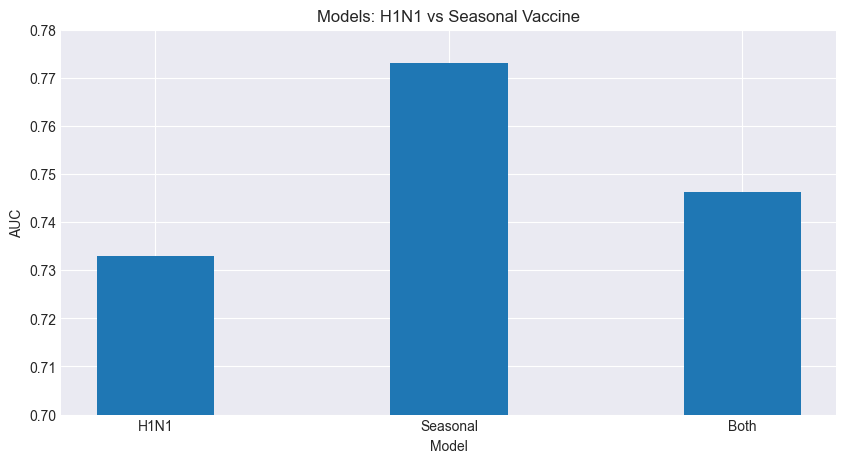

In [25]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
data = {'H1N1':0.7330, 'Seasonal':0.7730, 'Both':0.7463}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, 
        width = 0.4)
 
plt.ylim(0.7, 0.78)
#plt.yticks(np.arange(0.7, 1, step=0.05))
plt.ylabel("AUC")
plt.xlabel("Model")
plt.title("Models: H1N1 vs Seasonal Vaccine")
plt.show()

In [90]:
test_features_df = pd.read_csv(d + "/Datasets/test_set_features_normalized(new num).csv", 
                               index_col="respondent_id")

In [91]:
submission_df = pd.read_csv(d+"/submission_format.csv", 
                            index_col="respondent_id")

In [92]:
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [93]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features_df.index.values, 
                              submission_df.index.values)
                              


In [ ]:
with torch.inference_mode(): #no grad, avoids training and gradient calculation
      #forward 
      test_logits = model(x_test2).squeeze()
      test_logits2 = model2(x_test2).squeeze()
      #logits into predictions (probabilities) and labels with "round"
      test_pred2 = torch.round(torch.sigmoid(test_logits2)) 
      #loss & accuracy for Test set
      test_loss2 = loss_fn(test_logits2, y_test2)
      y_loss2['test'].append(test_loss2.cpu().detach().numpy())
      test_acc2= accuracy_fn(y_true=y_test2,
                             y_pred=test_pred2)
      y_accuracy2['test'].append(test_acc2)

In [38]:

# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = test_probas[0][:, 1]
submission_df["seasonal_vaccine"] = test_probas[1][:, 1]

submission_df.head()

NameError: name 'test_probas' is not defined

In [ ]:
submission_df.to_csv(d+'/Output/my_submission_dnn.csv', index=True)